# **AP155 Lab Assignment** 
## Module 1: Integrals and Derivatives

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 to 5 are worth 20, 20, 10, 30, and 20 points, respectively).

_Due Date_: **5PM of November 3 (Thu)**



### Student Information 

_Full Name (Last Name, First Name)_: Andeo, Lovely \
_Student No._: 2020-05405\
_Section_: HX4

### Submission Information

_Date and Time Submitted (most recent upload)_: 

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Lovely L. Andeo** 

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - XX/20
* Problem 2 - XX/20
* Problem 3 - XX/10
* Problem 4 - XX/30
* Problem 5 - XX/20

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

### PROBLEM 1 (20 pts.) 
**Integration using the trapezoidal rule and Simpson's rule**

Calculate the integral of the function $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Do the numerical calculation using the trapezoidal rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(8 pts.; 4 pts. for the code & 4 pts. for the discussion text)*

2. What are the percentage errors of your answers in (1)? *(2 pts.)*

3. Repeat the calculation using Simpson's rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(8 pts.;  4 pts. for the code & 4 pts. for the discussion text)*

4. What are the percentage errors of your answers in (3)? How do they compare with the results from (1) for the same number of slices? *(2 pts.)*

In [34]:
import numpy as np

# This is the function we want to integrate
def f(x):
    return 2*x**4 + 3*x**2 +4*x + 5
# Integration limits
a = 0.0 
b = 5.0 

# Implementing the trapezoidal rule
def integ_trap(N, a, b):
  h= (b-a)/N
  
  s = 0.5*f(a) + 0.5*f(b)
  for k in range(1,N):
      s += f(a+k*h)
  s = s*h
  return(s)

N_arr = np.array([10, 100, 1000]) # get estimated integrals for different values of N
I_exact = 1450.0
pct_err = np.zeros(len(N_arr))
s_arr = np.zeros(len(N_arr))

for i in np.arange(len(N_arr)):
  s_arr[i] = integ_trap(N_arr[i], a, b)
  pct_err[i] = np.abs(1- s_arr[i]/I_exact)*100
  print("N =",N_arr[i], ", Estimate=",s_arr[i], ", Percent error =",pct_err[i])


N = 10 , Estimate= 1471.4375 , Percent error = 1.4784482758620765
N = 100 , Estimate= 1450.2145812500003 , Percent error = 0.014798706896579361
N = 1000 , Estimate= 1450.0021458331234 , Percent error = 0.00014798849126140823


In [35]:
def integ_simp(N, a, b):
  h = (b-a)/N

  s = f(a) + f(b)
  for k in range(1,N,2): # loops over the odd values of k
      s += 4*f(a+k*h)
  for k in range(2,N,2): # loops over the even values of k
      s += 2*f(a+k*h)
  s = s*(1./3)*h
  return(s)

N_arr = np.array([10, 100, 1000]) # estimates integrals for different values of N
s_arr = np.zeros(len(N_arr))
pct_err = np.zeros(len(N_arr))
I_exact = 1450.0

for i in np.arange(len(N_arr)):
  s_arr[i] = integ_simp(N_arr[i], a, b)
  pct_err[i] = np.abs(1- s_arr[i]/I_exact)*100
  print("N =",N_arr[i], ", Estimate=",s_arr[i], ", Percent error =",pct_err[i])


N = 10 , Estimate= 1450.0833333333333 , Percent error = 0.005747126436772554
N = 100 , Estimate= 1450.0000083333337 , Percent error = 5.747126552435589e-07
N = 1000 , Estimate= 1450.0000000008342 , Percent error = 5.753175713607561e-11


### PROBLEM 2 (20 pts.)

**Integration using the adaptive trapezoidal rule method and Romberg integration**

Calculate the integral $ I = \int_0^1 \sin^2 \sqrt{100x} dx $.

1. Do the numerical calculation using the adaptive trapezoidal rule method to an approximate accuracy of $\epsilon = 10^{-6}$. Start with one single integration slice and work up from there to two, four, eight, and so forth. Save and print out the number of slices, its estimate of the integral, and its estimate of the error on the integral, for each value of the number of slices $N$, until the target accuracy is reached. *(8 pts.; 4 pts. for the code & 4 pts. for the discussion text)*

2. Repeat the calculation using the Romberg integration technique. Save and print out the same variables as in (1). *(8 pts.; 4 pts. for the code & 4 pts. for the discussion text)*

3. Compare the results from both calculations by creating a plot of error estimates vs. $N$. Annotate your chart completely (include proper axis labels and legend). Describe how the trends for the two techniques compare. *(4 pts.; 2 pts. for the chart & 2 pts. for the discussion text)*

In [13]:
from numpy import e, sin, sqrt, linspace, ones
import matplotlib as plt

a = 0 # integration lower bound
b = 1 # integration upper bound
N = 1 # intial number of integration slices
e = 1e-6 # accuracy bound

def f(x):
    return (sin(sqrt(100*x)))**2

def trapezoid_adapt(f,N,I0):
    h = (b-a)/(N)
    x = linspace(a,b,N+1) # number of points is number of slices + 1
    
    weight = ones(N+1) # number of points is number of slices + 1
    weight[0] = 0
    weight[-1] = 0
    weight[::2] = 0 # summing over odd only
    
    I = 0.5*I0 + h*sum(weight*f(x))
    
    return I, (1/3)*(I-I0)


Ivals, Evals, Nvals = list(), list(), list()
I0, E0 = trapezoid_adapt(f,N,0)[0], 1

while abs(E0) > e:
    
    N *= 2
    I0, E0 = trapezoid_adapt(f,N,I0)
    Ivals.append(I0)
    Evals.append(E0)
    Nvals.append(N)

hz = ones(len(Nvals))*1e-6
print(f"An accuracy of 1e-6 is reached at the number of slices N = {N}")

An accuracy of 1e-6 is reached at the number of slices N = 65536


In [25]:
from math import sin, sqrt


def f(x):
    '''the function'''
    return sin(10 * sqrt(x))**2


def trapesozidal(a, b, N):
    h = (b - a) / N
    return h * ((0.5 * (f(a) + f(b))) + sum([f(a + i * h) for i in range(1, N)]))


N = 1  # step size
error = 1

while error > 10**-6:  # putting desired accuracy as 10^-6
    I_1 = trapesozidal(0, 1, N)
    N *= 2
    I_2 = trapesozidal(0, 1, N)
    error = abs(1/3 * (I_2 - I_1))
    print("the integral is", I_2, "\n the error is", error)

the integral is 0.3252319078064746 
 the error is 0.05908414108660751
the integral is 0.5122828507233318 
 the error is 0.06235031430561906
the integral is 0.4029974484782485 
 the error is 0.03642846741502777
the integral is 0.4301033692947472 
 the error is 0.009035306938832902
the integral is 0.44841466578747 
 the error is 0.006103765497574279
the integral is 0.4539129312153759 
 the error is 0.001832755142635293
the integral is 0.4553485043728021 
 the error is 0.00047852438580873546
the integral is 0.45571126645324106 
 the error is 0.00012092069347964991
the integral is 0.4558021996516641 
 the error is 3.0311066141005167e-05
the integral is 0.4558249481324202 
 the error is 7.582826918706154e-06
the integral is 0.4558306362016461 
 the error is 1.8960230753021592e-06
the integral is 0.4558320582782708 
 the error is 4.7402554155991555e-07


In [9]:
def trapezoid(f,N):
    """
    Regular Trapezoidal Rule
    """
    h = (b-a)/(N)
    x = linspace(a,b,N+1) # number of points is number of slices + 1
    weight = ones(N+1) # number of points is number of slices + 1
    weight[0] = 0.5
    weight[-1] = 0.5
    
    return h*sum(weight*f(x))

I1 = trapezoid(f,1)
R0 = list()
R0.append(I1)
error = 1
h = (b-a)/(N)

def romberg(R0,m_max):
    
    R = list()
    error = 1.0
    
    for m in range(m_max):
        
        m = int(m)
        if m == 0: 
            val = trapezoid(f,m_max)
            error = (1/3)*(val-R0[0])
        else:
            num = 1/(4**m-1)*(R[m-1]-R0[m-1])
            val = R[m-1]+num
            error = num + h**(2*m+2)
            
        R.append(val)
    
    return R, error

i = 1
print(f"Slice {i}: {R0}\n")
while abs(error) > e:
    
    i += 1 
    R0, error = romberg(R0,i)
    print(f"Slice {i}: {R0}\n")

print(f"The integration achieves an accuracy of 1e-6 for the number of slices N = {i}")

Slice 1: [0.14797948454665205]

Slice 2: [0.3252319078064746, 0.38431604889308213]

Slice 3: [0.43079757183944845, 0.4659861265171064, 0.47143079835870805]

Slice 4: [0.5122828507233315, 0.5394446103512924, 0.5443418426069049, 0.5454991607695747]

Slice 5: [0.45902066640404526, 0.4412666049642832, 0.43472140460514924, 0.4329813976527404, 0.43254015152287045]

Slice 6: [0.42216668286887116, 0.40988202169047977, 0.40778971613889287, 0.4073622290203809, 0.40726176169241085, 0.40723705163392554]

Slice 7: [0.4067588542747065, 0.4016229114099849, 0.4010723040579519, 0.40096567846936554, 0.4009405939574008, 0.40093441490780646, 0.40093287580237885]

Slice 8: [0.40299744847824825, 0.4017436465460955, 0.40175169555516954, 0.40176247954718886, 0.40176560425729796, 0.40176641071897917, 0.4017666138925594, 0.4017666647830001]

The integration achieves an accuracy of 1e-6 for the number of slices N = 8


In [27]:
from __future__ import division, print_function
from numpy import empty

def f(x):
    return sin(sqrt(100*x))**2

def resum(f,a,b,N):
	
	h = (b - a)/N
	
	s = 0
	for k in range(1,N//2+1):
		s+=f(a + (2*k-1)*h)
	
	return s*h
	
a = 0
b = 1


I = (b-a)/2*(f(b)+f(a))
eps=1
N=1

R = empty((100,100))
R[0,0]=I
i=0
while eps>1e-6:

	N*=2
	i+=1
	
	I_old = R[i-1,0]
	I_new = I_old/2 + resum(f,a,b,N)
	#eps = abs(I-I_new)/3
	#I = I_new
	
	R[i,0] = I_new
	s = '\t'
	s += '{0:.7f}'.format(R[i,0])
	for m in range(i):
		R[i,m+1] =R[i,m] + 1/(4**(m+1)-1)*(R[i,m] - R[i-1,m])
		s += ' {0:.7f}'.format(R[i,m])
	
	print(s)
	
	eps = abs(R[i,m+1]-R[i-1,m])
	I = R[i,m+1]
	
	print('N={}\t I={}\t eps={}'.format(N,I,eps))

	0.3252319 0.3252319
N=2	 I=0.38431604889308213	 eps=0.23633656434643008
	0.5122829 0.5122829 0.5746332
N=4	 I=0.5873209727713417	 eps=0.20300492387825952
	0.4029974 0.4029974 0.3665690 0.3526980
N=8	 I=0.34897386185747614	 eps=0.2383471109138655
	0.4301034 0.4301034 0.4391387 0.4439767 0.4454255
N=16	 I=0.4458037647108326	 eps=0.09682990285335646
	0.4484147 0.4484147 0.4545184 0.4555437 0.4557274 0.4557678
N=32	 I=0.4557774922310969	 eps=0.00997372752026432
	0.4539129 0.4539129 0.4557457 0.4558275 0.4558320 0.4558324 0.4558325
N=64	 I=0.45583249446137863	 eps=5.500223028170881e-05
	0.4553485 0.4553485 0.4558270 0.4558325 0.4558325 0.4558325 0.4558325 0.4558325
N=128	 I=0.4558325323050135	 eps=3.784363489245379e-08


In [14]:

plt.title("Comparison of the tecniques")
plt.ylabel("Error estimate |err|")
plt.xlabel("Number of slices, N")
plt.plot(Nvals,Evals,'b--')
plt.plot(Nvals,hz,'k')
plt.xlim(0,10^4)
plt.show()

AttributeError: module 'matplotlib' has no attribute 'figure'

make for loop that computes N=1, then it has to loop by 2 until it reaches the best approximation of 10^-6 (4096 and dulo)

### PROBLEM 3 (10 pts.)

**Integration using Gaussian quadrature**

Calculate the integral from Problem 1 using the Gaussian quadrature method: $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Define the function $\tt gaussxw$ from Appendix E of the Newman text (and run the cell). *(2 pts.)*

2. Calculate the integral using the $\tt gaussxw$ function in (1) and number of slices $N = 3$. Describe each step in the calculation clearly and concisely. *(8 pts.; 4 pts. for the code & 4 pts. for the discussion text)*

In order to define the function $\tt gaussxw$, the file gaussxw.py was first loaded in the same folder as this notebook.

In [48]:
# Define gaussxw

from gaussxw import gaussxw

The integrand was then defined as well as the bounds and number of slices. Next, the sample points and weight were calculated and mapped to the general domain using the formula given in the book. Finally, the integration was perfomed.

In [47]:
def f(x):
    return 2*x**4 + 3*x**2 + 4*x + 5
    
a = 0.0 # Lower bound
b = 5.0 # Upper bound
N = 3 # Number of slices

# Calculating the position and the weight, and mapping them to the required domain
x,w = gaussxw(N)
x_p = 0.5*(b-a)*x + 0.5*(b+a)
w_p = 0.5*(b-a)*w

# Performing the integration
s = 0.0
for i in range(N):
    s += w_p[i]*f(x_p[i])

print(s)

1450.000000000002


There's also a faster way to integrate the given, which is using the scipy **integrate.quadrature()** method. For the sake of comparison, the integral was also evaluated using that method.

In [6]:
from scipy import integrate

f = lambda x: 2*x**4 + 3*x**2 + 4*x + 5 
j = integrate.quadrature(f, 0.0, 5.0) # Calling the method
print(j)

(1449.9999999999998, 0.0)


tuple

In [46]:
# Calculate the percent error of both methods

I_exact = 1450
gauss = np.abs(1- s/I_exact)*100
sci = np.abs(1-j[0]/I_exact)*100 # We use index since j is a tuple

print(gauss)
print(sci)

1.3322676295501878e-13
1.1102230246251565e-14


From the resulting percent errors, the scipy **integrate.quadrature()** method was shown to be a bit more accurate. Although the difference are just very small.

### PROBLEM 4 (30 pts.)

**Physics Application: Anharmonic Oscillator**

_Refer to Exercise 5.10 of the Newman text._ Consider an anharmonic oscillator with potential $V(x)$ symmetric about $x = 0$. Let us set our anharmonic oscillator going with amplitude $a$. That is, at $t = 0$ we release it from rest at position $x = a$ and it swings back towards the origin. Then at $t = 0$ we have $dx/dt = 0$ and the equation for its total energy becomes $E = V(a)$, i.e., the total energy of the particle is given in terms of the amplitude.

When the particle reaches the origin for the first time, it has gone through one quarter of a period of the oscillator. The period $T$ is given by: $$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a)-V(x)}}. $$

1. Suppose the potential is $V(x) = x^4$ and the mass of the particle is $m = 1$. Write a Python function that calculates the period of the oscillator for given amplitude a using Gaussian quadrature with $N = 20$ points. Describe each step clearly and concisely. *(16 pts.; 8 pts. for the code & 8 pts. for the discussion text)*

2. Use your function to make a graph of the period for amplitudes ranging from $a = 0$ to $a = 2$. Describe the behavior you find and explain these results clearly and concisely. *(14 pts.; 7 pts. for the plot & 7 pts. for the discussion text)*

/var/folders/nd/l3h_t2k14fqdnbr6dbvvblth0000gn/T/ipykernel_64753/3983429147.py:24: RuntimeWarning: divide by zero encountered in true_divide
  y = 1/sqrt(E-V(xp))
/var/folders/nd/l3h_t2k14fqdnbr6dbvvblth0000gn/T/ipykernel_64753/3983429147.py:25: RuntimeWarning: invalid value encountered in multiply
  s = sum(y*wp)


Text(0, 0.5, 'period')

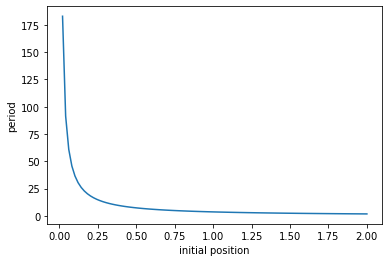

In [23]:
from __future__ import division, print_function

from os import sys
from numpy import linspace
from pylab import *
sys.path.append('cpresources')
from gaussxw import gaussxw

N = 100
m = 1
V = lambda x: x**4

x,w = gaussxw(N)


def T(a_):
	
	a = 0
	b = a_
	xp = 0.5*(b-a)*x + 0.5*(b+a)
	wp = 0.5*(b-a)*w
	E = V(a_)
	
	y = 1/sqrt(E-V(xp))
	s = sum(y*wp)

	return s*sqrt(8*m)
	
a = linspace(0,2,100)
periods = [T(ai) for ai in a]

plot(a,periods)
xlabel('initial position')
ylabel('period')

### PROBLEM 5 (20 pts.)

**Differentiation using central difference**

1. Calculate the derivative of the function $1 + \frac{1}{2} \tanh 2x$ in the range $-2 \le x \le 2$ using central difference. Describe each step of the calculation clearly and concisely. *(10 pts.; 5 pts. for the code & 5 pts. for the discussion text)*

2. Calculate an analytic formula for the derivative and make a graph with your numerical result and the analytic answer on the same plot. Plot the exact answer as lines and the numerical one as dots. Describe how the two results compare. *(10 pts.; 5 pts. for the code & 5 pts. for the discussion text)*

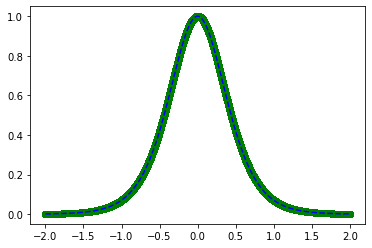

In [24]:
from numpy import linspace, tanh, cosh
from pylab import plot, show

h = 10**-5
x_initial = -2
x_final = 2

x = linspace(x_initial, x_final, int((x_final - x_initial) / h), endpoint=True)
y = 1 + 0.5 * tanh(2 * x)

analytic_equation = 1 / cosh(2 * x)**2

derivative = []
for i in range(1, len(x) - 1):
    derivative.append((y[i+1] - y[i-1]) / (2 * h))

plot(x, analytic_equation, "go")
plot(x[1:-1], derivative, "b--")

show()
